In [117]:
import os
import sys
from project_path import PROJECT_PATH
sys.path.insert(0, PROJECT_PATH)
from src.llm_reviewer.notebook_reviewer import IssueLevel


service_account_path = PROJECT_PATH + "/creds/google__sa.json"
tracking_sheet_id = "1qBU7Kvuuij2fxbqPxebReKMxWgIBmOIE5Gi4ZuX0j_4"
delivery_sheet_id = "1eUif5I8xhHU8fY0X9v8r2JI9hWPh7Dq_9VXpSIHwww4"


ISSUE_LEVEL = IssueLevel.MEDIUM
DATA_DIR = PROJECT_PATH + '/data/05_01_2024/'

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [118]:
import pandas as pd

from src.sheets_utils import download_sheet_as_df


contributors_df = download_sheet_as_df(
    service_account_path,
    tracking_sheet_id,
    "Contributors"
)

tasks_sheets_df = pd.concat(
    [
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_2"
        ),
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_3"
        ),
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_4"
        ),
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_5"
        ),
    ],
    ignore_index=True
)

tasks_sheets_df["completion_date"] = pd.to_datetime(tasks_sheets_df["completion_date"], format="mixed").dt.date
tasks_sheets_df

,task_link,metadata__topic,assigned_to_email,completion_status,modified_question?,duration_mins,completion_date,comments,metadata__problem_type,metadata__target_length,review_status,reviewer_email,Team_Type(Internal/External),metadata__type,modified_question
0,https://colab.research.google.com/drive/10cwJG...,python_language_and_scripting > functions_and_...,lucas.k@turing.com,Done,FALSE,13,2023-12-21,,query,1,done,test,External,NaN,NaN
1,https://colab.research.google.com/drive/16dCMc...,unit_testing_methodology > test_driven_develop...,ruturaj.m@turing.com,Done,TRUE,15,2023-12-21,,query,1,,,External,NaN,NaN
2,https://colab.research.google.com/drive/17KaqC...,python_language_and_scripting > decorators,ruturaj.m@turing.com,Done,FALSE,10,2023-12-21,,query,1,,,External,NaN,NaN
3,https://colab.research.google.com/drive/17mMiU...,algorithms > by_topic > bit_manipulation,daniel.oluwakayode-c@turing.com,Done,FALSE,20,2023-12-20,,query,1,,,External,NaN,NaN
4,https://colab.research.google.com/drive/18nl4l...,python_language_and_scripting > decorators,ruturaj.m@turing.com,Done,FALSE,10,2023-12-21,,modification,1,,,External,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,https://colab.research.google.com/drive/1OFgjc...,Intermediate_Learning_Learn_to_use_some_tool__...,,Unclaimed,NaN,None,NaN,None,NaN,None,None,None,NaN,None,FALSE
2752,https://colab.research.google.com/drive/1OFaBb...,Intermediate_Learning_Learn_to_use_some_tool__...,,Unclaimed,NaN,None,NaN,None,NaN,None,None,None,NaN,None,FALSE
2753,https://colab.research.google.com/drive/1qheya...,Intermediate_Write_unit_test_Explain_code_with...,,Unclaimed,NaN,None,NaN,None,NaN,None,None,None,NaN,None,FALSE
2754,https://colab.research.google.com/drive/1XaQdN...,Intermediate_Write_unit_test_Explain_code_with...,,Unclaimed,NaN,None,NaN,None,NaN,None,None,None,NaN,None,FALSE


In [119]:
old = tasks_sheets_df.copy()#df[df["completion_date"] <= pd.to_datetime("2023/12/27").date()]
old_completed = old[old["completion_status"] == "Done"]
old_completed

,task_link,metadata__topic,assigned_to_email,completion_status,modified_question?,duration_mins,completion_date,comments,metadata__problem_type,metadata__target_length,review_status,reviewer_email,Team_Type(Internal/External),metadata__type,modified_question
0,https://colab.research.google.com/drive/10cwJG...,python_language_and_scripting > functions_and_...,lucas.k@turing.com,Done,FALSE,13,2023-12-21,,query,1,done,test,External,NaN,NaN
1,https://colab.research.google.com/drive/16dCMc...,unit_testing_methodology > test_driven_develop...,ruturaj.m@turing.com,Done,TRUE,15,2023-12-21,,query,1,,,External,NaN,NaN
2,https://colab.research.google.com/drive/17KaqC...,python_language_and_scripting > decorators,ruturaj.m@turing.com,Done,FALSE,10,2023-12-21,,query,1,,,External,NaN,NaN
3,https://colab.research.google.com/drive/17mMiU...,algorithms > by_topic > bit_manipulation,daniel.oluwakayode-c@turing.com,Done,FALSE,20,2023-12-20,,query,1,,,External,NaN,NaN
4,https://colab.research.google.com/drive/18nl4l...,python_language_and_scripting > decorators,ruturaj.m@turing.com,Done,FALSE,10,2023-12-21,,modification,1,,,External,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,https://colab.research.google.com/drive/11mho-...,Intermediate_General_coding_help_Rewrite_code_...,shaharyar.t@turing.com,Done,NaN,45,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE
2680,https://colab.research.google.com/drive/1ZAxQ3...,Intermediate_General_coding_help_Rewrite_code_...,lucas.k@turing.com,Done,NaN,45,2024-01-04,None,NaN,None,None,None,NaN,None,FALSE
2743,https://colab.research.google.com/drive/1hA-Qt...,Intermediate_Learning_Learn_to_program__0_V3_B...,archit.k@turing.com,Done,NaN,45,2024-01-04,None,NaN,None,None,None,NaN,None,FALSE
2744,https://colab.research.google.com/drive/1TQrys...,Intermediate_Learning_Learn_to_program__1_V3_B...,lucas.k@turing.com,Done,NaN,45,2024-01-04,None,NaN,None,None,None,NaN,None,FALSE


In [130]:
specific_date = pd.to_datetime("2028-12-27").date()
old_completed.loc[old_completed['completion_date'] == specific_date, 'completion_date'] = pd.to_datetime("2023-12-27").date()



/tmp/ipykernel_24857/261608193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_completed.loc[old_completed['completion_date'] == specific_date, 'completion_date'] = pd.to_datetime("2023-12-27").date()


In [132]:

january_2023_filter = (old_completed['completion_date'] >= pd.to_datetime("2023-01-01").date()) & \
                      (old_completed['completion_date'] <= pd.to_datetime("2023-01-31").date())
old_completed.loc[january_2023_filter, 'completion_date'] = old_completed.loc[january_2023_filter, 'completion_date'].apply(lambda x: x.replace(year=2024))




/tmp/ipykernel_24857/1268994523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_completed.loc[january_2023_filter, 'completion_date'] = old_completed.loc[january_2023_filter, 'completion_date'].apply(lambda x: x.replace(year=2024))


In [139]:

feb_2024_filter = old_completed['completion_date'] == pd.to_datetime("2024-02-01").date()
old_completed.loc[feb_2024_filter, 'completion_date'] = old_completed.loc[feb_2024_filter, 'completion_date'].apply(lambda x: x.replace(month=1, day=2))

mar_2024_filter = old_completed['completion_date'] == pd.to_datetime("2024-03-01").date()
old_completed.loc[mar_2024_filter, 'completion_date'] = old_completed.loc[mar_2024_filter, 'completion_date'].apply(lambda x: x.replace(month=1, day=3))

apr_2024_filter = old_completed['completion_date'] == pd.to_datetime("2024-03-02").date()
old_completed.loc[apr_2024_filter, 'completion_date'] = pd.to_datetime("2024-01-02").date()




/tmp/ipykernel_24857/1881296966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_completed.loc[feb_2024_filter, 'completion_date'] = old_completed.loc[feb_2024_filter, 'completion_date'].apply(lambda x: x.replace(month=1, day=2))
/tmp/ipykernel_24857/1881296966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_completed.loc[mar_2024_filter, 'completion_date'] = old_completed.loc[mar_2024_filter, 'completion_date'].apply(lambda x: x.replace(month=1, day=3))
/tmp/ipykernel_24857/1881296966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

In [138]:
old_completed['completion_date'].value_counts().sort_index()

completion_date
2023-12-16      1
2023-12-18      5
2023-12-19     29
2023-12-20     90
2023-12-21     71
2023-12-22     41
2023-12-23    104
2023-12-24     33
2023-12-25     98
2023-12-26    153
2023-12-27    177
2023-12-28    197
2023-12-29    151
2023-12-30     31
2023-12-31     17
2024-01-01    118
2024-01-02    220
2024-01-03    211
2024-01-04    112
2024-01-05      6
2024-03-02      3
Name: count, dtype: int64

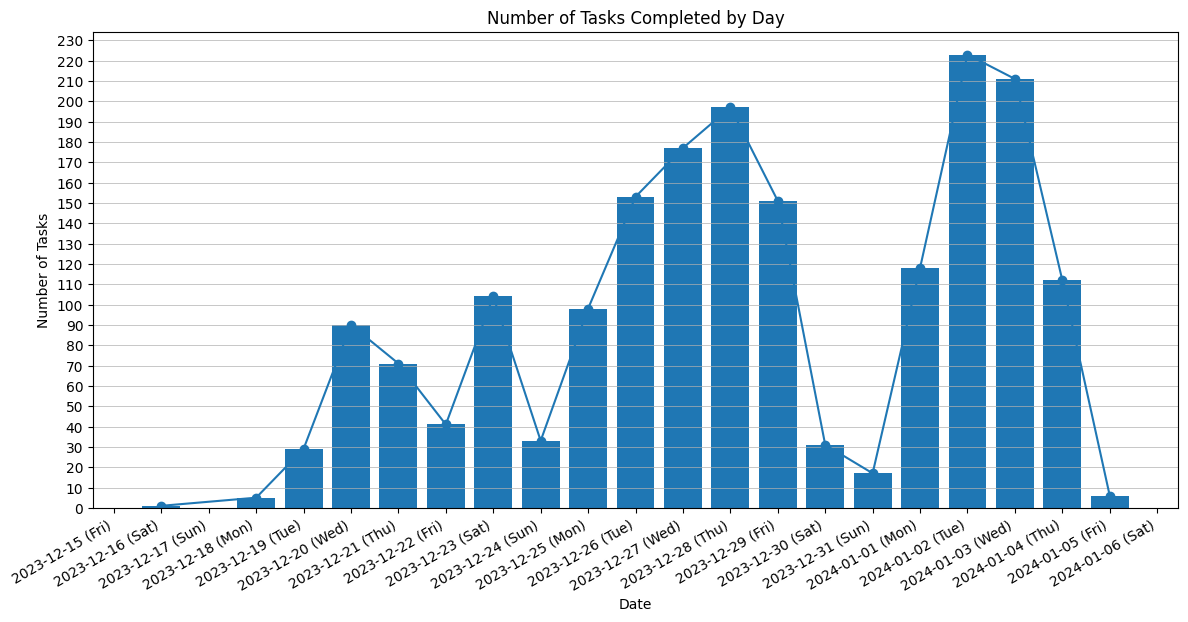

In [143]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

tasks_by_day = old_completed['completion_date'].value_counts().sort_index()
plt.figure(figsize=(14,7))
plt.plot(tasks_by_day.index, tasks_by_day.values, marker='o')
plt.title('Number of Tasks Completed by Day')
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d (%a)'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
plt.bar(tasks_by_day.index, tasks_by_day.values)
plt.gcf().autofmt_xdate() # Rotate date labels to prevent overlap

plt.show()


In [120]:
delivered_df = pd.concat(
    [
        download_sheet_as_df(
            service_account_path,
            delivery_sheet_id,
            "Batch 1"
        ),
        download_sheet_as_df(
            service_account_path,
            delivery_sheet_id,
            "Batch 2"
        ),
        download_sheet_as_df(
            service_account_path,
            delivery_sheet_id,
            "Batch 3"
        ),
        download_sheet_as_df(
            service_account_path,
            delivery_sheet_id,
            "Batch 4"
        ),
    ],
    ignore_index=True
)
delivered_df

,task_link,metadata__topic,duration_mins,number_of_turns,jsonl_link
0,https://colab.research.google.com/drive/1X4H8L...,algorithms > by_data_structure > strings,119,6,https://drive.google.com/file/d/1cAGKy7u_sYzZW...
1,https://colab.research.google.com/drive/1G_d7Z...,algorithms > by_data_structure > strings,60,3,https://drive.google.com/file/d/1ql2hECkLQG3pI...
2,https://colab.research.google.com/drive/1vYEPg...,algorithms > by_data_structure > strings,50,3,https://drive.google.com/file/d/1YMkZcyiEqpqo3...
3,https://colab.research.google.com/drive/1_arMF...,algorithms > by_topic > divide_and_conquer,10,1,https://drive.google.com/file/d/1Z2bdCHcRWyr6k...
4,https://colab.research.google.com/drive/10Ahc4...,algorithms > by_topic > divide_and_conquer,10,1,https://drive.google.com/file/d/1n7v8gQtsbwrbB...
...,...,...,...,...,...
1954,https://colab.research.google.com/drive/14ga5S...,First_Timer_General_coding_help_Explain_comple...,35,5,https://drive.google.com/file/d/1Xi6JYVjmuSsJa...
1955,https://colab.research.google.com/drive/1tqU85...,First_Timer_General_coding_help_Refactor_code_...,25,4,https://drive.google.com/file/d/1GOY0YHtEgxB1e...
1956,https://colab.research.google.com/drive/1x0T4S...,First_Timer_General_coding_help_Refactor_code_...,40,4,https://drive.google.com/file/d/1qd_dssHgdRjG0...
1957,https://colab.research.google.com/drive/1BnBJH...,Intermediate_General_coding_help_Do_a_code_rev...,45,5,https://drive.google.com/file/d/14X-fBaIxw46fs...


In [121]:
def fix_task_link(row):
    if isinstance(row["task_link"], float) and pd.isna(row["task_link"]):
        row["task_link"] = row["#REF!"]
    return row

undelivered_old = old_completed[~old_completed["task_link"].isin(delivered_df["task_link"])]
try:
    undelivered_old = undelivered_old.apply(fix_task_link, axis=1)
except KeyError:
    pass
undelivered_old

,task_link,metadata__topic,assigned_to_email,completion_status,modified_question?,duration_mins,completion_date,comments,metadata__problem_type,metadata__target_length,review_status,reviewer_email,Team_Type(Internal/External),metadata__type,modified_question
193,https://colab.research.google.com/drive/1cP6qz...,unit_testing_methodology > test_ai_and_ml_models,patelia.a@turing.com,Done,FALSE,,NaT,,modification,1,,,External,NaN,NaN
194,https://colab.research.google.com/drive/1dZpsB...,python_language_and_scripting > advanced_netwo...,patelia.a@turing.com,Done,FALSE,,NaT,,modification,1,,,External,NaN,NaN
308,https://colab.research.google.com/drive/1lHYB-...,algorithms > by_data_structure > trees,marcus.a@turing.com,Done,FALSE,20,2023-12-22,,NaN,2+,test,test,NaN,modification,NaN
310,https://colab.research.google.com/drive/1rfNQU...,web_development > web_services,abdullah.i@turing.com,Done,FALSE,43,2023-12-23,,NaN,2+,None,None,NaN,query,NaN
712,https://colab.research.google.com/drive/1d613I...,algorithms > by_data_structure > trees,ritesh.r@turing.com,Done,NaN,35,2023-12-28,,NaN,2+,Reviewed,ruturaj.m@turing.com,NaN,query,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,https://colab.research.google.com/drive/14SohM...,Intermediate_General_coding_help_Add_comments_...,shaharyar.t@turing.com,Done,NaN,45,2024-01-04,None,NaN,None,None,None,NaN,None,FALSE
2680,https://colab.research.google.com/drive/1ZAxQ3...,Intermediate_General_coding_help_Rewrite_code_...,lucas.k@turing.com,Done,NaN,45,2024-01-04,None,NaN,None,None,None,NaN,None,FALSE
2743,https://colab.research.google.com/drive/1hA-Qt...,Intermediate_Learning_Learn_to_program__0_V3_B...,archit.k@turing.com,Done,NaN,45,2024-01-04,None,NaN,None,None,None,NaN,None,FALSE
2744,https://colab.research.google.com/drive/1TQrys...,Intermediate_Learning_Learn_to_program__1_V3_B...,lucas.k@turing.com,Done,NaN,45,2024-01-04,None,NaN,None,None,None,NaN,None,FALSE


In [7]:
import io
import pickle
import nbformat

from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload



def download_and_parse_notebook(service_account_file, file_id):
    # Authenticate with the service account
    credentials = service_account.Credentials.from_service_account_file(
        service_account_file, scopes=['https://www.googleapis.com/auth/drive'])
    service = build('drive', 'v3', credentials=credentials)

    # Request to download the file
    request = service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)

    # Download the file
    done = False
    while not done:
        status, done = downloader.next_chunk()
        print("Download progress: %d%%." % int(status.progress() * 100))

    # Move the buffer's pointer to the beginning
    fh.seek(0)

    # Open the notebook
    nb_parsed_notebook = nbformat.read(fh, as_version=4)

    return {'file_id': file_id, 'nb_parsed_notebook': nb_parsed_notebook}


def threading_processor(service_account_path, file_id, results):
    results.append(download_and_parse_notebook(service_account_path, file_id))


df = undelivered_old

threads = []
from concurrent.futures import ThreadPoolExecutor

def get_file_id_from_task_link(task_link):
    try:
        return task_link.split("/")[-1]
    except Exception as e:
        print('ERROR' + '='*60)
        print(task_link)
        return None

file_ids = df["task_link"].apply(get_file_id_from_task_link).dropna().tolist()
parsed_conversations = []

with ThreadPoolExecutor(max_workers=20) as executor:
    futures = [executor.submit(download_and_parse_notebook, service_account_path, file_id) for file_id in file_ids]
    for future in futures:
        try:
            result = future.result()
            parsed_conversations.append(result)
        except Exception as e:
            print(f"Failed to download and parse notebook: {e}")


with open(DATA_DIR + 'parsed_conversations.pkl', 'wb') as f:
    pickle.dump(parsed_conversations, f)

with open(DATA_DIR + 'parsed_conversations.pkl', 'rb') as f:
    parsed_conversations = pickle.load(f)

Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Failed to download and parse notebook: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/1lHYB-8JiU67LlaqjvaRuLYUbetxWbnD5%23scrollTo%3DvzyhtIq2Tt8Q?alt=media returned "File not found: 1lHYB-8JiU67LlaqjvaRuLYUbetxWbnD5#scrollTo=vzyhtIq2Tt8Q.". Details: "[{'message': 'File not found: 1lHYB-8JiU67LlaqjvaRuLYUbetxWbnD5#scrollTo=vzyhtIq2Tt8Q.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">
Failed to download and parse notebook: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/1rfNQU__74pEdovonm_-u6yrhF0UsAa2C?alt=media returned "File not found: 1rfNQU__74pEdovonm_-u6yrhF0UsAa2C.". Details: "[{'message': 'File not found: 1rfNQU__74pEdovonm_-u6yrhF0UsAa2C.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">
Download progress: 100%.
Download progress: 100%.
Download progress: 10

In [89]:
import pickle


with open(DATA_DIR + 'parsed_conversations.pkl', 'rb') as f:
    parsed_conversations = pickle.load(f)
    
from src.llm_reviewer.notebook_reviewer import review_notebooks

OFFSET = 0
notebooks = parsed_conversations

import os

batch_size = 30
total_notebooks = len(notebooks)
reviews_pkl_folder = DATA_DIR + 'raw_reviews_pkls/'
os.makedirs(reviews_pkl_folder, exist_ok=True)

for i in range(OFFSET, total_notebooks, batch_size):
    batch_notebooks = notebooks[i:i+batch_size]
    print(f"Reviewing notebooks {i+1} to {min(i+batch_size, total_notebooks)} out of {total_notebooks}")
    batch_reviews = review_notebooks(batch_notebooks, max_threads_per_notebook=4, max_concurrent_notebooks=10, verbose=1)
    batch_file_name = f'review_results{i+1}-{min(i+batch_size, total_notebooks)}.pkl'
    batch_file_path = os.path.join(reviews_pkl_folder, batch_file_name)
    with open(batch_file_path, 'wb') as f:
        pickle.dump(batch_reviews, f)

Reviewing notebooks 1 to 30 out of 239
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Notebook reviews done: Success: 1/30, Fail: 0/30, Completed: 1/30
Filling out missing header...
Notebook reviews done: Success: 2/30, Fail: 0/30, Completed: 2/30
Notebook reviews done: Success: 3/30, Fail: 0/30, Completed: 3/30
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Filling out missing header...
Notebook reviews done: Success: 4/30, Fail:

In [90]:
from src.llm_reviewer.notebook_reviewer import notebook_reviews_to_df

import pickle
import glob

review_files = glob.glob(DATA_DIR + 'raw_reviews_pkls/*.pkl')
reviews = []
for file_path in review_files:
    with open(file_path, 'rb') as f:
        reviews.extend(pickle.load(f))

seen_paths = set()
deduped_reviews = []
for review in reversed(reviews):
    if review is not None and review['nb_path'] not in seen_paths:
        seen_paths.add(review['nb_path'])
        deduped_reviews.append(review)
reviews = list(reversed(deduped_reviews))
len(reviews)

239

In [102]:
from src.llm_reviewer.turn_reviewer import load_rubric, load_system_prompt


CODE_PROMPT = load_system_prompt('aggregated_reviews_code_judge')
CODE_RUBRICS = load_rubric('code_reviewer')
LANG_PROMPT = load_system_prompt('aggregated_reviews_english_judge')
LANG_RUBRICS = load_rubric('lang_reviewer')


from src.llm_reviewer.llm_api import make_llm_request, LLMAPIFactory

def get_judgment(reviewer, feedback):
    llm_client = LLMAPIFactory().get()
    if reviewer == 'code':
        prompt = CODE_PROMPT
        rubrics = CODE_RUBRICS
    elif reviewer == 'lang':
        prompt = LANG_PROMPT
        rubrics = LANG_RUBRICS
    else:
        raise ValueError("Reviewer type not recognized.")
    
    formatted_prompt = prompt.format(FEEDBACK=feedback, GRADING_RUBRICS=rubrics)
    judgment = make_llm_request(
        llm_client,
        [{'role': 'system', 'content': formatted_prompt}],
        'gpt-4-1106-preview',
        temperature= 0.0,
        max_tokens = 4000,
        response_format = {'type': "json_object"},
        retries = 3,
    )
    return judgment

# Example of running the function
#judgment = get_judgment(CODE_PROMPT, gpt_reviews_df.iloc[0]['code_feedback'])
#judgment


In [103]:
def process_dataframe(reviews, issue_level):
    df = notebook_reviews_to_df(filter(None, reviews), issue_level)
    for i, (index, row) in enumerate(df.iterrows()):
        print(f"Row {i + 1}/{len(df)} for {issue_level}:")
        code_judgment = get_judgment('code', row['code_feedback'])
        lang_judgment = get_judgment('lang', row['lang_feedback'])
        df.loc[index, 'code_judgment'] = code_judgment['judgment']
        df.loc[index, 'code_judgment_score'] = code_judgment['score']
        df.loc[index, 'lang_judgment'] = lang_judgment['judgment']
        df.loc[index, 'lang_judgment_score'] = lang_judgment['score']
        df.loc[index, 'total_score'] = row['code_score'] + row['lang_score']
        print(f"Code Score: {row['code_score']}, Lang Score: {row['lang_score']}, Total Score: {df.loc[index, 'total_score']}")
        print(f"Code Judgment: {df.loc[index, 'code_judgment']}")
        print(f"Full Code Score: {df.loc[index, 'code_judgment_score']}")
        print(f"Language Judgment: {df.loc[index, 'lang_judgment']}")
        print(f"Full language Score: {df.loc[index, 'lang_judgment_score']}")
        print('='*60)
    return df

from concurrent.futures import ThreadPoolExecutor
import threading

# Create a counter and a lock outside the function

def process_row(index, row, total_reviews):
    global counter, results
    try:
        code_judgment = get_judgment('code', row['code_feedback'])
        lang_judgment = get_judgment('lang', row['lang_feedback'])
        results[index] = {
            'code_judgment': code_judgment.get('judgment', None),
            'code_judgment_score': code_judgment.get('score', None),
            'lang_judgment': lang_judgment.get('judgment', None),
            'lang_judgment_score': lang_judgment.get('score', None),
            'total_score': row['code_score'] + row['lang_score']
        }
    except Exception as e:
        print(f"Error processing row {index}: {str(e)}")
    with counter_lock:
        counter += 1
        print(f"Processed {counter}/{total_reviews} rows")

def process_dataframe_parallel(reviews, issue_level, max_workers=20):
    global counter
    counter = 0  # Reset the counter before starting
    df = notebook_reviews_to_df(filter(None, reviews), issue_level)
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        for i, (index, row) in enumerate(df.iterrows()):
            executor.submit(process_row, index, row, len(reviews))
    # Update the dataframe with the results after all rows have been processed
    for index, result in results.items():
        for key, value in result.items():
            df.loc[index, key] = value
    return df

In [107]:

counter = 0
counter_lock = threading.Lock()
results = {}

df_reviews = process_dataframe_parallel(reviews, ISSUE_LEVEL, max_workers=20)
df_reviews.sort_values(by=['code_score', 'lang_score'], inplace=True, ascending=False)
df_reviews.to_csv(DATA_DIR + f'report_{ISSUE_LEVEL}.csv')
import pickle

with open(DATA_DIR + '2step_reviews_df.pkl', 'wb') as f:
    pickle.dump(df_reviews, f)


Processed 1/239 rows
Processed 2/239 rows
Processed 3/239 rows
Processed 4/239 rows
Processed 5/239 rows
Processed 6/239 rows
Processed 7/239 rows
Processed 8/239 rows
Processed 9/239 rows
Processed 10/239 rows
Processed 11/239 rows
Processed 12/239 rows
Processed 13/239 rows
Processed 14/239 rows
Processed 15/239 rows
Processed 16/239 rows
Processed 17/239 rows
Processed 18/239 rows
Processed 19/239 rows
Processed 20/239 rows
Processed 21/239 rows
Processed 22/239 rows
Processed 23/239 rows
Processed 24/239 rows
Processed 25/239 rows
Processed 26/239 rows
Processed 27/239 rows
Processed 28/239 rows
Processed 29/239 rows
Processed 30/239 rows
Processed 31/239 rows
Processed 32/239 rows
Processed 33/239 rows
Processed 34/239 rows
Processed 35/239 rows
Processed 36/239 rows
Processed 37/239 rows
Processed 38/239 rows
Processed 39/239 rows
Processed 40/239 rows
Processed 41/239 rows
Processed 42/239 rows
Processed 43/239 rows
Processed 44/239 rows
Processed 45/239 rows
Processed 46/239 ro

In [108]:
import matplotlib.pyplot as plt


def plot_histograms(df, issue_level):
    plt.figure(figsize=(21, 7))

    df['code_judgment_score'] = df['code_judgment_score'].astype(float)
    df['lang_judgment_score'] = df['lang_judgment_score'].astype(float)

    # Plotting histogram for code scores
    plt.subplot(2, 2, 1)
    plt.hist(df['code_score'], bins=range(1, 7), align='left', color='skyblue', edgecolor='black')
    plt.title('Histogram of AVG Code Scores')
    plt.xlabel('Code Score')
    plt.ylabel('Frequency')

    # Plotting histogram for language scores
    plt.subplot(2, 2, 2)
    plt.hist(df['lang_score'], bins=range(1, 7), align='left', color='lightgreen', edgecolor='black')
    plt.title('Histogram of AVG Language Scores')
    plt.xlabel('Language Score')
    plt.ylabel('Frequency')

    # Plotting histogram for code judgment scores
    plt.subplot(2, 2, 3)
    plt.hist(df['code_judgment_score'], bins=range(1, 7), align='left', color='lightcoral', edgecolor='black')
    plt.title('Histogram of Code Judgment Scores' + f' for {issue_level} issues')
    plt.xlabel('Code Judgment Score')
    plt.ylabel('Frequency')

    # Plotting histogram for language judgment scores
    plt.subplot(2, 2, 4)
    plt.hist(df['lang_judgment_score'], bins=range(1, 7), align='left', color='lightcoral', edgecolor='black')
    plt.title('Histogram of Language Judgment Scores' + f' for {issue_level} issues')
    plt.xlabel('Language Judgment Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


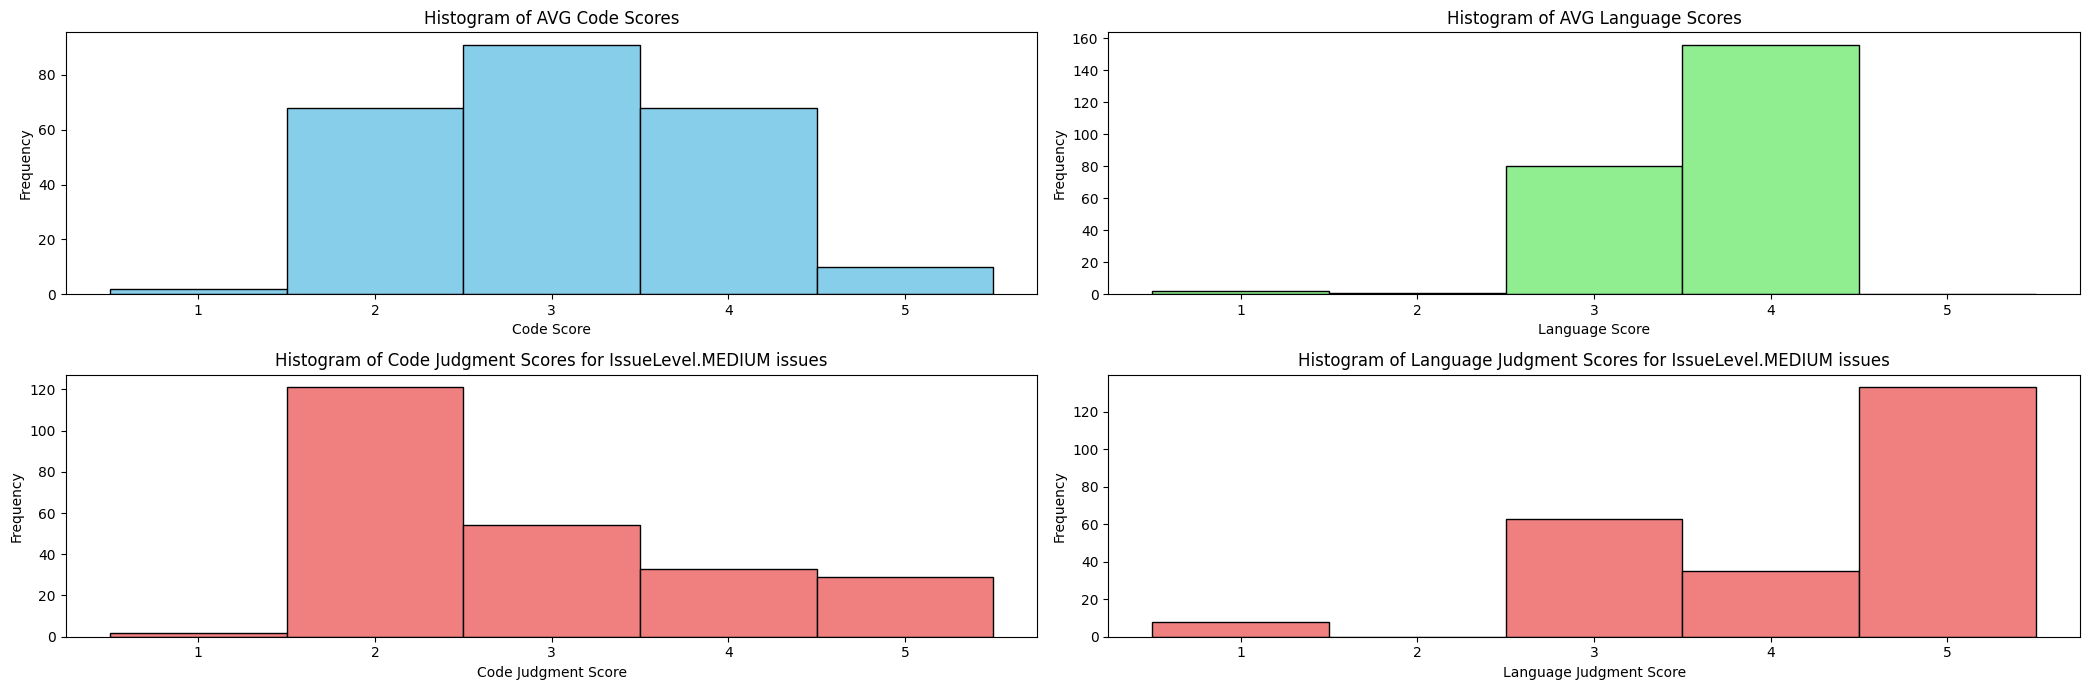

In [109]:
plot_histograms(df_reviews, ISSUE_LEVEL)

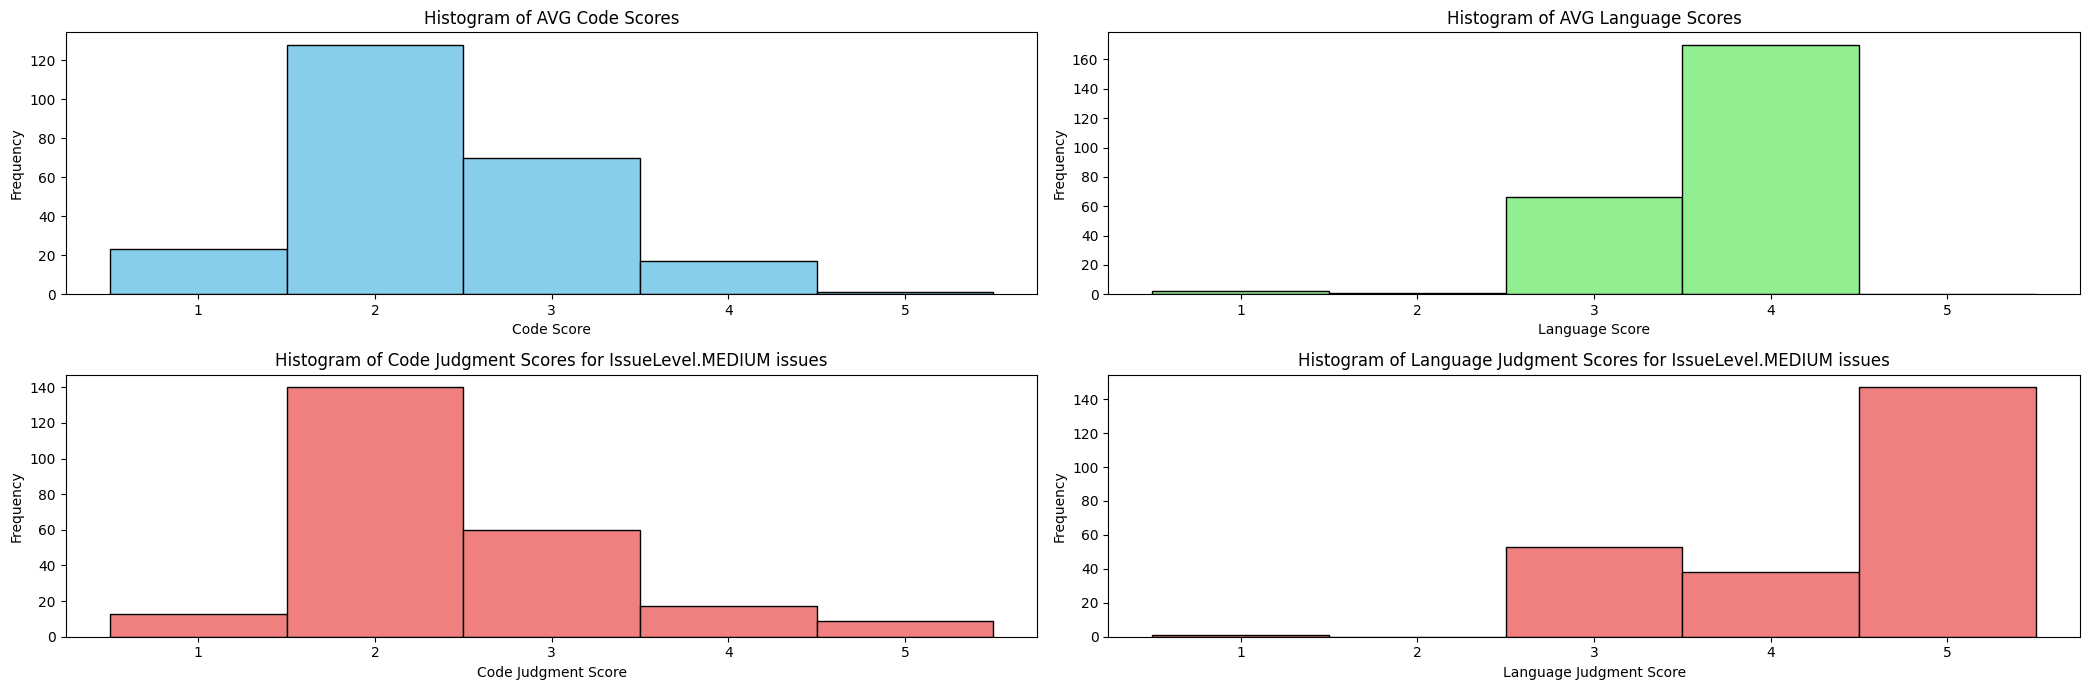

In [76]:
plot_histograms(df_reviews, ISSUE_LEVEL)


In [94]:
def filter_reviews_by_score(reviews, score):
    # Filter reviews AND turns
    filtered_reviews = []
    for review in reviews:
        filtered_turns = []
        for turn in review['turns']:
            try:
                if turn['code_review']['score'] == score:
                    filtered_turns.append(turn)
            except KeyError:
                print(f"Review with nb_path {review['nb_path']} is missing the 'score' key. Full turn review:\n{turn}")
        if filtered_turns:
            review_copy = review.copy()
            review_copy['turns'] = filtered_turns
            filtered_reviews.append(review_copy)
    return filtered_reviews

reviews_ones = filter_reviews_by_score(reviews, 1)
reviews_twos = filter_reviews_by_score(reviews, 2)
reviews_threes = filter_reviews_by_score(reviews, 3)

Review with nb_path 1g0rdBIbvX6Tgfk46_NohBbiZvalpyVY6 is missing the 'score' key. Full turn review:
{'turn': [{'role': 'human', 'steps': [{'type': 'markdown', 'content': 'In this setup, `create_database` is a session-scoped fixture that initializes and closes the database. `clean_database` is a function-scoped fixture that ensures each test starts with a clean database state.'}, {'type': 'markdown', 'content': 'Can fixtures be used to mock external services or APIs in integration tests?'}]}, {'role': 'llm', 'steps': [{'type': 'markdown', 'content': "Yes, fixtures can be used to mock external services or APIs in integration tests. This is particularly useful when you want to isolate your tests from external dependencies or when such services are not reliably available during testing. You can use libraries like unittest.mock or responses to create mocks. Here's an example using `unittest.mock`:"}, {'type': 'code', 'content': 'from unittest.mock import MagicMock\nimport pytest\n\n@pytest.

In [95]:
len(reviews), len(reviews_ones), len(reviews_twos), len(reviews_threes)

(239, 11, 147, 91)

In [4]:
len(reviews), len(reviews_ones), len(reviews_twos), len(reviews_threes)

(239, 104, 154, 133)

In [ ]:
missing imports
missing code

In [35]:
def generate_reports_for_scores(filtered_reviews):
    reports = []
    for i, review in enumerate(filtered_reviews):
        review_report = f"Review {i+1}:\n"
        for j, turn in enumerate(review['turns']):
            turn_report = f"  Turn {j+1}:\n"
            feedback = turn['code_review']['feedback_text']
            for key, value in feedback.items():
                if value:
                    turn_report += f"    {key}: {value}\n"
            review_report += turn_report
        reports.append({'content': review_report, 'id': review['nb_path']})
    return reports

In [110]:

from src.llm_reviewer.llm_api import make_llm_request, LLMAPIFactory
from src.llm_reviewer.constants import PATH_TO_SECRETS


CLASSIFY_PROMPT = """
Your task is to classify a sample of text data given provided context for classification. Output in JSON.

**Classification is allowed to include multiple classes at once**: {multiclass}

# CONTEXT START
{context_prompt}
# CONTEXT END

# AVAILABLE CLASSES START
{classes}
If you are uncertain or no classes fit the sample, leave classes field an empty array [].
# AVAILABLE CLASSES END

# JSON OUTPUT FORMAT START
{{"classes": ["class_name"]}}
# JSON OUTPUT FORMAT END
"""

CLASSIFY_INPUT_PROMPT = """
# SAMPLE TO CLASSIFY START
{sample}
# SAMPLE TO CLASSIFY END

Your answer ->
"""

def classify(sample, context_prompt, classes=None, multiclass=False):
    if classes is None:
        classes = 'Classes are not provided, please use an appropriate class name, max length is 5 words.'
    INPUT_PROMPT = """
    # SAMPLE START
    {sample}
    # SAMPLE END""".strip()
    llm_client = LLMAPIFactory().get()
    classes = make_llm_request(
        llm_client,
        [{'role': 'system', 'content': CLASSIFY_PROMPT.format(context_prompt=context_prompt, classes=classes, multiclass=multiclass)},
         {'role': 'user', 'content': CLASSIFY_INPUT_PROMPT.format(sample=sample)}],
        'gpt-4-1106-preview',
        temperature= 0.0,
        max_tokens = 4000,
        response_format = {'type': "json_object"},
        retries = 3,
        seed=42
    )
    return classes['classes'] if 'classes' in classes else None

from src.llm_reviewer.llm_api import make_llm_request
import importlib

importlib.reload(importlib.import_module('src.llm_reviewer.llm_api'))


<module 'src.llm_reviewer.llm_api' from '/home/saya/chario/upstream_character_tasks/src/llm_reviewer/llm_api.py'>

In [111]:
def classify_reports(report_for_filtered, context, classes, verbose=0):
    reports_with_tags = []
    class_distribution = {'total': 0}
    for i, report in enumerate(report_for_filtered):
        if verbose > 0:
            print(f'Classifying report {i+1}/{len(report_for_filtered)}')
        found_classes = classify(report['content'], context, classes=classes, multiclass=True)
        if found_classes is None:
            print('Error, continuing')
            continue
        reports_with_tags.append({**report, 'classes': found_classes})
        for cls in found_classes:
            class_distribution[cls] = class_distribution.get(cls, 0) + 1
        class_distribution['total'] += 1
        if verbose > 1:
            print('Current class distribution:', class_distribution)
            print('For sample:')
            print(report['content'])
            print("Found classes:", found_classes)
            print('-'*60)
    if verbose > 0:
        print('Final class distribution:', class_distribution)
    return class_distribution

In [112]:
context = """
The sample is a feedback given for a single or a few interaction or turns between human user and LLM Assistant in the middle of a multiturn conversation.
"""
classes = ["Code is missing", "Missing imports", "Actual problem", "Nitpicking, otherwise good", "Other"]

In [113]:
filter_for = 3
print('Filter for', filter_for)
print('-'*60)
filtered_reviews = filter_reviews_by_score(reviews, filter_for)
report_for_filtered = generate_reports_for_scores(filtered_reviews)
for report in report_for_filtered:
    print(report)
    print('-'*60)

Filter for 3
------------------------------------------------------------
Review with nb_path 1g0rdBIbvX6Tgfk46_NohBbiZvalpyVY6 is missing the 'score' key. Full turn review:
{'turn': [{'role': 'human', 'steps': [{'type': 'markdown', 'content': 'In this setup, `create_database` is a session-scoped fixture that initializes and closes the database. `clean_database` is a function-scoped fixture that ensures each test starts with a clean database state.'}, {'type': 'markdown', 'content': 'Can fixtures be used to mock external services or APIs in integration tests?'}]}, {'role': 'llm', 'steps': [{'type': 'markdown', 'content': "Yes, fixtures can be used to mock external services or APIs in integration tests. This is particularly useful when you want to isolate your tests from external dependencies or when such services are not reliably available during testing. You can use libraries like unittest.mock or responses to create mocks. Here's an example using `unittest.mock`:"}, {'type': 'code', 

In [51]:
filter_for = 1
print('Filter for', filter_for)
print('-'*60)
filtered_reviews = filter_reviews_by_score(reviews, filter_for)
report_for_filtered = generate_reports_for_scores(filtered_reviews)

Filter for 1
------------------------------------------------------------


In [78]:
wip_reviews_nb_paths = [review['nb_path'] for review in filtered_reviews[:10]]
wip_reviews = [review for review in reviews if review['nb_path'] in wip_reviews_nb_paths]

len(wip_reviews)


10

In [106]:

from importlib import reload
import src.llm_reviewer.notebook_reviewer as nr
reload(nr)
import src.llm_reviewer.notebook_parser as np
reload(np)


<module 'src.llm_reviewer.notebook_parser' from '/home/saya/chario/upstream_character_tasks/src/llm_reviewer/notebook_parser.py'>

In [84]:
import pickle


with open(DATA_DIR + 'parsed_conversations.pkl', 'rb') as f:
    parsed_conversations = pickle.load(f)
    
from src.llm_reviewer.notebook_reviewer import review_notebooks

notebooks = [conv for conv in parsed_conversations if conv['file_id'] in wip_reviews_nb_paths]

next_gen_wip_reviews = review_notebooks(notebooks, max_threads_per_notebook=4, max_concurrent_notebooks=16, verbose=1)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Assistant', role='assistant', function_call=None, tool_calls=None))
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Assistant', role='assistant', function_call=None, tool_calls=None))
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='User', role='assistant', function_call=None, tool_calls=None))
Review process completed successfully.
Notebook reviews done: Success: 1/10, Fail: 0/10, Completed: 1/10
Review process completed successfully.
Notebook reviews done: Success: 2/10, Fail: 0/10, Completed: 2/10
Review process completed successfully.
Notebook reviews done: Success: 3/10, Fail: 0/10, Completed: 3/10
Review process completed successfully.
Notebook reviews done: Success: 4/10, Fail: 0/10, Completed: 4/10
Review process completed successfully.
Notebook reviews done: Success: 5/10, Fail: 0/10, Completed: 5/10


In [71]:
def get_filtered_reports(reviews, filter_score):
    # filters reviews AND turns
    print('Filter for', filter_score)
    print('-'*60)
    filtered_reviews = filter_reviews_by_score(reviews, filter_score)
    reports_for_filtered = generate_reports_for_scores(filtered_reviews)
    for report in reports_for_filtered:
        print(report['id'])
        print(report['content'])
        print('-'*60)
    return {'filtered_reviews': filtered_reviews, 'reports': reports_for_filtered}

In [72]:
reports_pre = get_filtered_reports(wip_reviews, 1)
print('='*60)
print('='*60)
print('='*60)
reports_next_gen = get_filtered_reports(next_gen_wip_reviews, 1)

print('='*60)
print('Comparing the length of filtered reports before and after the next generation review:')
print(len(reports_pre['filtered_reviews']), len(reports_next_gen['filtered_reviews']))
len(reports_pre['filtered_reviews']), len(reports_next_gen['filtered_reviews'])

Filter for 1
------------------------------------------------------------
1lRSKf1dRMv1HjQgA34ZeKnRe2rly_LJN
Review 1:
  Turn 1:
    critical_issues: The Assistant's reply does not contain any code to review.
    summary: The Assistant's response lacks code, thus it cannot be evaluated for code quality.

------------------------------------------------------------
1lsnNhBZZ2HavdXmQm85s5xnK90DQGo8f
Review 2:
  Turn 1:
    critical_issues: The LLM reply does not contain any code to review.

------------------------------------------------------------
1mB8j7AeuF0Qc32y-rJWxrcaip0mbm5Hc
Review 3:
  Turn 1:
    critical_issues: The LLM did not provide the requested code for refactoring the 'Circle' class to include a property for 'diameter' with a getter and a setter.

------------------------------------------------------------
1mud1XnD12t02czIETCwoCzd5aehCZAUU
Review 4:
  Turn 1:
    minor_issues: The response does not contain any code snippets or code cells to review.
    summary: The resp

(20, 2)

In [68]:
reports_next_gen['filtered_reviews'][1]['nb_path']

'1ngTHJYLorAoqYB5V5d9D3lyZXm5cmQCK'

In [70]:
review_notebooks([parsed_conv_with_file_id])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Assistant', role='assistant', function_call=None, tool_calls=None))
Reviews done: 0, Reviews left after this one: 11
Review for turn_id=0 by reviewer='english_reviewer' is done. 1 / 12 reviews completed.
Reviews done: 1, Reviews left after this one: 10
Review for turn_id=0 by reviewer='code_reviewer' is done. 2 / 12 reviews completed.
Reviews done: 2, Reviews left after this one: 9
Review for turn_id=1 by reviewer='english_reviewer' is done. 3 / 12 reviews completed.
Reviews done: 3, Reviews left after this one: 8
Review for turn_id=1 by reviewer='code_reviewer' is done. 4 / 12 reviews completed.
Reviews done: 4, Reviews left after this one: 7
Review for turn_id=2 by reviewer='english_reviewer' is done. 5 / 12 reviews completed.
Reviews done: 5, Reviews left after this one: 6
Review for turn_id=2 by reviewer='code_reviewer' is done. 6 / 12 reviews completed.
Reviews done: 6, Reviews left after t

[{'turns': [{'turn': [{'role': 'human',
      'steps': [{'type': 'markdown',
        'content': 'Can you provide a Python function to calculate the in-degree and out-degree of all vertices in a directed graph?'}]},
     {'role': 'llm',
      'steps': [{'type': 'markdown',
        'content': "You can use the NetworkX library in Python to work with directed graphs and calculate the in-degree and out-degree of each vertex.\nHere's a Python function that takes a directed graph as input and returns dictionaries containing the in-degree and out-degree of each vertex:"},
       {'type': 'code',
        'content': 'import networkx as nx\n\ndef calculate_degrees(directed_graph):\n    """\n    Calculate in-degree and out-degree of all vertices in a directed graph.\n\n    Parameters:\n    - directed_graph: NetworkX DiGraph (directed graph)\n\n    Returns:\n    - in_degrees: Dictionary mapping vertex to its in-degree\n    - out_degrees: Dictionary mapping vertex to its out-degree\n    """\n    in_

In [69]:
file_id_to_find = '1ngTHJYLorAoqYB5V5d9D3lyZXm5cmQCK'
parsed_conv_with_file_id = next((conv for conv in parsed_conversations if conv['file_id'] == file_id_to_find), None)
parsed_conv_with_file_id


{'file_id': '1ngTHJYLorAoqYB5V5d9D3lyZXm5cmQCK',
 'nb_parsed_notebook': {'cells': [{'cell_type': 'markdown',
    'id': 'b93dc4a0',
    'metadata': {'id': 'b93dc4a0'},
    'source': '# Metadata\n\n**Python Topics** - algorithms > by_data_structure > graphs\n\n**Type** - query\n\n**Target Number of Turns (User + Assistant)** - 6-10\n'},
   {'cell_type': 'markdown',
    'id': '601d101e',
    'metadata': {'id': '601d101e'},
    'source': '# Conversation'},
   {'cell_type': 'markdown',
    'id': '5e9ae411',
    'metadata': {'id': '5e9ae411'},
    'source': '**User**\n\nCan you provide a Python function to calculate the in-degree and out-degree of all vertices in a directed graph?\n'},
   {'cell_type': 'markdown',
    'source': "**Assistant**\n\nYou can use the NetworkX library in Python to work with directed graphs and calculate the in-degree and out-degree of each vertex.\nHere's a Python function that takes a directed graph as input and returns dictionaries containing the in-degree and ou

In [115]:
filter_for = 2
print('Filter for', filter_for)
print('-'*60)
filtered_reviews = filter_reviews_by_score(reviews, filter_for)
report_for_filtered = generate_reports_for_scores(filtered_reviews)
class_distribution_for_ones = classify_reports(report_for_filtered, context, None, verbose=2)
class_distribution_for_ones

Filter for 2
------------------------------------------------------------
Review with nb_path 1g0rdBIbvX6Tgfk46_NohBbiZvalpyVY6 is missing the 'score' key. Full turn review:
{'turn': [{'role': 'human', 'steps': [{'type': 'markdown', 'content': 'In this setup, `create_database` is a session-scoped fixture that initializes and closes the database. `clean_database` is a function-scoped fixture that ensures each test starts with a clean database state.'}, {'type': 'markdown', 'content': 'Can fixtures be used to mock external services or APIs in integration tests?'}]}, {'role': 'llm', 'steps': [{'type': 'markdown', 'content': "Yes, fixtures can be used to mock external services or APIs in integration tests. This is particularly useful when you want to isolate your tests from external dependencies or when such services are not reliably available during testing. You can use libraries like unittest.mock or responses to create mocks. Here's an example using `unittest.mock`:"}, {'type': 'code', 

{'total': 147,
 'Incorrect Mathematical Definition': 1,
 'Exception Handling Suggestion': 1,
 'Misleading Comment': 7,
 'Code Correctness Issue': 2,
 'Missing Import Statement': 2,
 'Unclear Explanation': 1,
 'Code Review Feedback': 57,
 'Missing Validation': 1,
 'Code Readability': 2,
 'Typographical Error': 1,
 'Critical Issue Identified': 6,
 'Incorrect Implementation': 11,
 'Lack of Comments': 6,
 'Variable Naming Issues': 2,
 'Algorithm Implementation Issues': 1,
 'Incorrect Code Parallelization': 1,
 'Misleading Example Usage': 1,
 'Missing Imports': 3,
 'Lacks Error Handling': 2,
 'Placeholder Values': 1,
 'Feedback on Code Snippet': 1,
 'Error Handling Issue': 2,
 'Variable Naming Suggestion': 3,
 'Code Consistency Comment': 1,
 'Incorrect Lambda Function': 1,
 'Misleading Comments': 1,
 'Mutable Default Argument Issue': 2,
 'DRY Principle Violation': 1,
 'Lack of Documentation': 1,
 'Missing Function Definition': 4,
 'Unrepresentative Performance Test': 1,
 'Code Readability S

In [116]:
class_distribution_sorted = sorted(class_distribution_for_ones.items(), key=lambda item: item[1], reverse=True)
for category, count in class_distribution_sorted:
    print(f"{category}: {count}")


total: 147
Code Review Feedback: 57
Incorrect Implementation: 11
Misleading Comment: 7
Critical Issue Identified: 6
Lack of Comments: 6
Missing Function Definition: 4
Variable Naming: 4
Lacks Comments: 4
Missing Imports: 3
Variable Naming Suggestion: 3
Unnecessary Code: 3
Missing Functionality: 3
Exception Handling: 3
Undefined Variable: 3
Poor Variable Naming: 3
Code Correctness Issue: 2
Missing Import Statement: 2
Code Readability: 2
Variable Naming Issues: 2
Lacks Error Handling: 2
Error Handling Issue: 2
Mutable Default Argument Issue: 2
Incorrect Logic: 2
Naming Convention: 2
Typo in Comment: 2
Missing Function: 2
Logical Error: 2
Correctness Issue: 2
Missing Implementation: 2
Non-executable Code: 2
Syntax Error: 2
Incomplete Code Snippet: 2
Irrelevant Code Provided: 2
Incorrect Solution: 2
Incomplete Implementation: 2
Runtime Error Risk: 2
Code Documentation: 2
Error Handling: 2
Lacks Exception Handling: 2
Incorrect Algorithm Implementation: 2
Inefficient Code: 2
Hardcoded Values

In [18]:
filter_for = 2
print('Filter for', filter_for)
print('-'*60)
filtered_reviews = filter_reviews_by_score(reviews, filter_for)
report_for_filtered = generate_reports_for_scores(filtered_reviews)
class_distribution_for_twos = classify_reports(report_for_filtered, context, classes, verbose=2)
class_distribution_for_twos

Classifying report 1/154
Current class distribution: {'Actual problem': 1}
For sample:
Review 1:
  Turn 1:
    critical_issues: The code incorrectly states that the GCD is undefined when both numbers are zero. In Python's `math.gcd`, the GCD of zero and zero is defined as zero.
    medium_issues: The function `lcm` should raise an exception or handle the case when both `a` and `b` are zero, as the LCM is not well-defined in this case.
    minor_issues: The comment 'Example usage' could be more descriptive to explain that the example demonstrates handling the case when both numbers are zero.

Found classes: ['Actual problem']
------------------------------------------------------------
Classifying report 2/154
Current class distribution: {'Actual problem': 2}
For sample:
Review 2:
  Turn 1:
    critical_issues: The `package_data` argument in the `setup.py` is incorrect. It should be `configs/*.json` instead of `config/*.json` to match the directory structure provided.
    summary: The c

{'Actual problem': 142,
 'Code is missing': 46,
 'Missing imports': 22,
 'Nitpicking, otherwise good': 26}

In [21]:
filter_for = 3
print('Filter for', filter_for)
print('-'*60)
filtered_reviews = filter_reviews_by_score(reviews, filter_for)
report_for_filtered = generate_reports_for_scores(filtered_reviews)
class_distribution_for_threes = classify_reports(report_for_filtered, context, classes, verbose=2)
class_distribution_for_threes

Filter for 3
------------------------------------------------------------
Classifying report 1/133
Current class distribution: {'Actual problem': 1, 'Nitpicking, otherwise good': 1}
For sample:
Review 1:
  Turn 1:
    medium_issues: The 'package_data' parameter is not correctly specified. It should map the package name to a list of patterns, not use an empty string as the key.
    minor_issues: The comment '# Other setup configurations' is unnecessary and can be removed for cleanliness.
    summary: The main issue is the incorrect use of the 'package_data' parameter, which could lead to the JSON files not being included in the package.

Found classes: ['Actual problem', 'Nitpicking, otherwise good']
------------------------------------------------------------
Classifying report 2/133
Current class distribution: {'Actual problem': 2, 'Nitpicking, otherwise good': 2}
For sample:
Review 2:
  Turn 1:
    medium_issues: The code lacks exception handling which could lead to the program crash

{'Actual problem': 98,
 'Nitpicking, otherwise good': 92,
 'Code is missing': 19,
 'Missing imports': 12}

In [22]:
filter_for = 4
print('Filter for', filter_for)
print('-'*60)
filtered_reviews = filter_reviews_by_score(reviews, filter_for)
report_for_filtered = generate_reports_for_scores(filtered_reviews)
class_distribution_for_fours = classify_reports(report_for_filtered, context, classes, verbose=2)
class_distribution_for_fours

Filter for 4
------------------------------------------------------------
Classifying report 1/112
Current class distribution: {'Nitpicking, otherwise good': 1}
For sample:
Review 1:
  Turn 1:
    minor_issues: The use of the `abs` function is unnecessary when calculating the LCM using the formula provided, as the product of two integers and the GCD will always be non-negative.
    summary: The code is correct and efficient, but there is a minor issue with the unnecessary use of the `abs` function.

Found classes: ['Nitpicking, otherwise good']
------------------------------------------------------------
Classifying report 2/112
Current class distribution: {'Nitpicking, otherwise good': 2}
For sample:
Review 2:
  Turn 1:
    minor_issues: The code snippet provided is correct and follows best practices for using property decorators in Python. However, the print statements could be improved for readability by removing the space before 'Initial' and 'Updated' in the string literals.
    s

{'Nitpicking, otherwise good': 109,
 'Actual problem': 13,
 'Missing imports': 9,
 'Code is missing': 9}

In [23]:
filter_for = 5
print('Filter for', filter_for)
print('-'*60)
filtered_reviews = filter_reviews_by_score(reviews, filter_for)
report_for_filtered = generate_reports_for_scores(filtered_reviews)
class_distribution_for_fives = classify_reports(report_for_filtered, context, classes, verbose=2)
class_distribution_for_fives

Filter for 5
------------------------------------------------------------
Classifying report 1/37
Current class distribution: {'Code is missing': 1}
For sample:
Review 1:
  Turn 1:
    summary: There is no code to review in the LLM's reply, as it consists solely of explanatory text.

Found classes: ['Code is missing']
------------------------------------------------------------
Classifying report 2/37
Current class distribution: {'Code is missing': 1, 'Nitpicking, otherwise good': 1}
For sample:
Review 2:
  Turn 1:
    summary: The code provided by the LLM is correct and follows best practices for file handling in Python.

Found classes: ['Nitpicking, otherwise good']
------------------------------------------------------------
Classifying report 3/37
Current class distribution: {'Code is missing': 2, 'Nitpicking, otherwise good': 1}
For sample:
Review 3:
  Turn 1:
    summary: There is no code to review in the LLM's reply.

Found classes: ['Code is missing']
--------------------------

{'Code is missing': 27, 'Nitpicking, otherwise good': 9, 'Other': 1}

In [13]:
class_distribution_for_ones

{'Code is missing': 104}

In [ ]:
idx= 2
df_reviews.iloc[idx]["code_judgment_score"], df_reviews.iloc[idx]["code_judgment"]

In [ ]:
df_reviews["avg_jdg_score"] = (df_reviews["code_judgment_score"] + df_reviews["lang_judgment_score"]) / 2
df_reviews.sort_values(by="avg_jdg_score", inplace=True, ascending=False)

In [ ]:
df_reviews.tail()

In [ ]:
df_reviews["task_link"] = df_reviews["nb_path"].apply(lambda x: f"https://colab.research.google.com/drive/{x}")

In [ ]:
df_reviews.loc[492]

In [ ]:
print(df_reviews.loc[492]["code_feedback"])

In [ ]:
df_reviews.loc[492]["lang_judgment"]

In [ ]:
df_reviews.loc[492]["task_link"]

In [ ]:
df_gpt_reviews = df_reviews[['task_link', 'code_feedback', 'lang_feedback', 'code_judgment', 'lang_judgment', 'avg_jdg_score']]
df_gpt_reviews.to_csv('gpt_reviews.csv', index=False)

In [ ]:
df_gpt_reviews["avg_jdg_score"].describe()

In [ ]:
df_gpt_reviews[df_gpt_reviews["avg_jdg_score"]<=2.5].shape